In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('height-weight.csv')
data.columns

Index(['Weight', 'Height'], dtype='object')

In [5]:
X=data[['Weight']]
y=data['Height']
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20 , random_state=45)

In [7]:
X_test 

,Weight
12,105
19,87
16,50
13,100
20,45


In [8]:
y_test

12    175
19    167
16    140
13    183
20    129
Name: Height, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

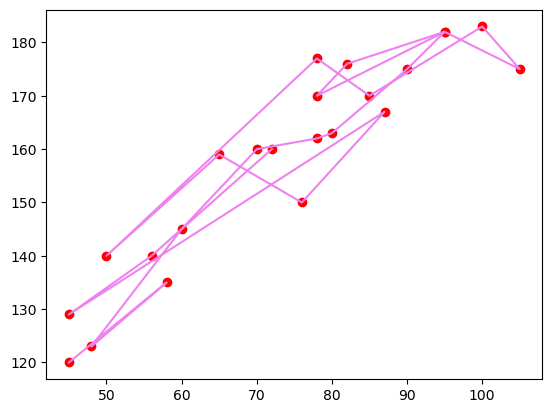

In [11]:
plt.scatter(X,y,c='red')
plt.plot(X,y,c='violet')

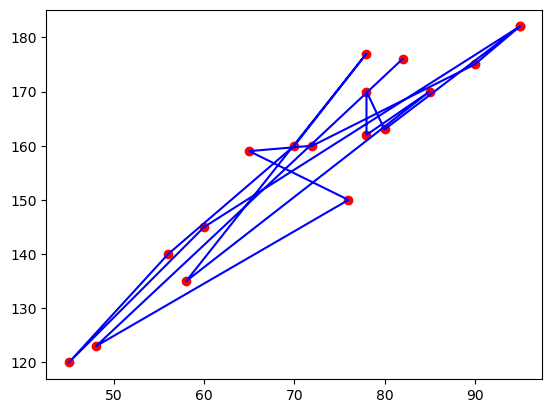

In [13]:
plt.scatter(X_train , y_train , c='red')
plt.plot(X_train , y_train , c='blue')

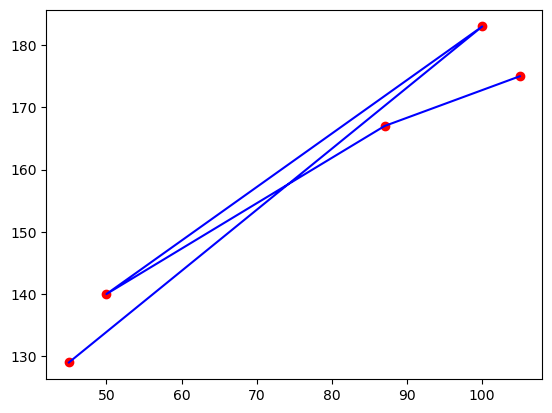

In [14]:
plt.scatter(X_test , y_test , c='red')
plt.plot(X_test , y_test , c='blue')

In [15]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

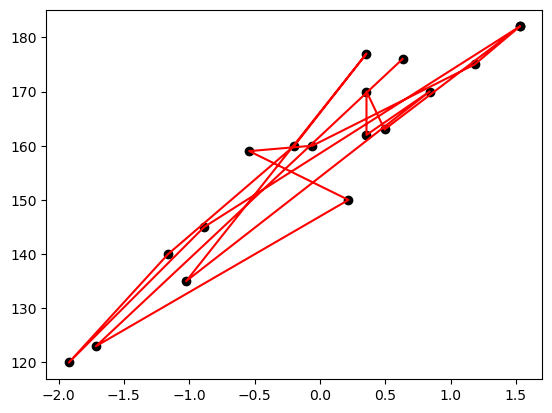

In [16]:
plt.scatter(X_train , y_train ,c='black')
plt.plot(X_train , y_train ,c='red')

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regression=LinearRegression()

In [19]:
regression.fit(X_train , y_train)

LinearRegression()

In [20]:
regression.intercept_

158.27777777777777

In [21]:
regression.coef_

array([17.56036817])

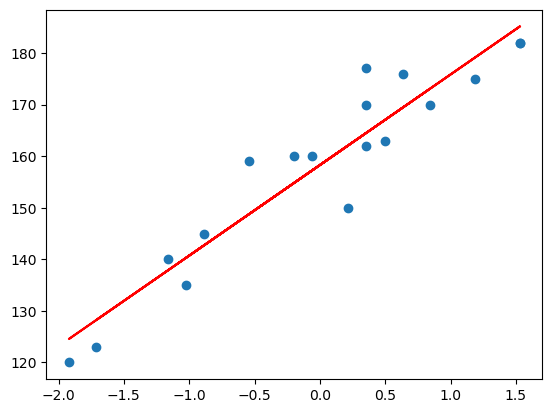

In [23]:
plt.scatter(X_train , y_train)
plt.plot(X_train , regression.predict(X_train),'red')

In [25]:
## Prediction for test data
y_pred_test=regression.predict(X_test)

In [26]:
y_pred_test

array([197.2541404 , 175.44353334, 130.61061882, 191.19563844,
       124.55211686])

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [28]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

148.3305305803652
10.546115299269644
12.179102207484968


In [29]:
from sklearn.metrics import r2_score

In [30]:
score=r2_score(y_test,y_pred_test)
score

0.656132857519554

In [31]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5415104766927386

In [36]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regression,open('regressor.pkl','wb'))

In [37]:
model_regressor=pickle.load(open('regressor.pkl','rb'))
model_regressor.predict(X_test)

array([197.2541404 , 175.44353334, 130.61061882, 191.19563844,
       124.55211686])